In [1]:
import os
os.chdir('E:\\Lyrics of 50 bands\\lyrics by song')

import nltk
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
files = []
for i in os.listdir(r"E:\\Lyrics of 50 bands\\Lyrics by song"):
    if i.endswith('.txt'):
        files.append(open(i).read())

In [3]:
len(files)

2500

In [4]:
files0 = files # save the raw text to files0 in case it will be used in the future

from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
# preprocess the raw text: lower-cased, stemming
for i in range(len(files)):
    tokens = nltk.word_tokenize(files[i])
    words = [w.lower() for w in tokens if w.isalpha()]
    stem = [lemma.lemmatize(w) for w in words]
    files[i] = ' '.join(stem)

In [6]:
from textblob import TextBlob

sentiment = []
for f in files:
    sentiment.append(TextBlob(f).sentiment.polarity)
    
from __future__ import division
sum(sentiment)/50

0.10894417972266103

In [7]:
s60 = ['Bob Dylan','The Beatles','The Beach Boys','The Supremes','The Kinks','The Animals','Cream','The Rolling Stones','The Doors','Elvis Presley']
s70 = ['Led Zeppelin','Pink Floyd','The Carpenters','Eagles','Elton John','Queen','The Who','Fleetwood Mac','Chicago','Deep Purple']
s80 = ['Guns N Roses','ACDC','Poison','U2','Def Leppard','Van Halen','Journey','Bon Jovi','Prince','Scorpions']
s90 = ['Nirvana','Pearl Jam','R.E.M','Weezer','Metallica','Red Hot Chili Peppers','Sonic Youth','Nine Inch Nails','The Smashing Pumpkins','Oasis']
s00 = ['Radiohead','The White Stripes','Coldplay','Nickelback','Linkin Park','Three Days Grace','My Chemical Romance','Breaking Benjamin','Muse','Avenged Sevenfold']
artists = s60 + s70 + s80 + s90 + s00

In [8]:
# save the lyrics text in order with the artists
files_ordered = []
for k in range(50):
    for i in os.listdir("E:\\Lyrics of 50 bands\\Lyrics by rock artist"):
        if artists[k] in i and i.endswith('.txt'):
            files_ordered.append(open(i).read())
            
# get sentiment scores
# Textblob library has already included the preprocessing of raw text like stemming, converting to lower-cased or ...
sentiment_total = []
for f in files_ordered:
    sentiment_total.append(TextBlob(f).sentiment.polarity)

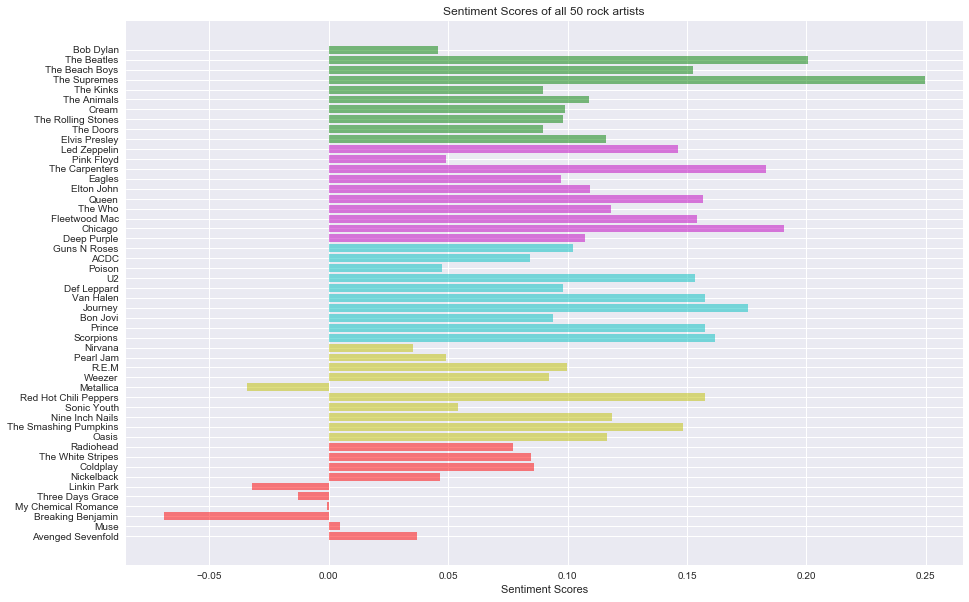

In [9]:
typ = [1]*10 + [2]*10 + [3]*10 + [4]*10 + [5]*10
colors = {1:'r', 2:'y',3:'c',4:'m',5:'g'}

plt.figure(figsize=(15,10))    
y_pos = np.arange(50)
plt.barh(y_pos, sentiment_total[::-1], align='center', alpha=0.5,color=[colors[t] for t in typ])
plt.yticks(y_pos, artists[::-1], fontsize=10)
plt.xlabel('Sentiment Scores')
plt.title("Sentiment Scores of all 50 rock artists")

plt.show()

In [37]:
files_60 = []
for i in os.listdir(r"E:\\Lyrics of 50 bands\\Lyrics by song"):
    if i.endswith('.txt') and i[:-4] in s60:
        files_60.append(open(i).read())

files_70 = []
for i in os.listdir(r"E:\\Lyrics of 50 bands\\Lyrics by song"):
    if i.endswith('.txt') and i[:-4] in s60:
        files_70.append(open(i).read())

files_80 = []
for i in os.listdir(r"E:\\Lyrics of 50 bands\\Lyrics by song"):
    if i.endswith('.txt') and i[:-4] in s80:
        files_80.append(open(i).read())

files_90 = []
for i in os.listdir(r"E:\\Lyrics of 50 bands\\Lyrics by song"):
    if i.endswith('.txt') and i[:-4] in s90:
        files_90.append(open(i).read())

files_00 = []
for i in os.listdir(r"E:\\Lyrics of 50 bands\\Lyrics by song"):
    if i.endswith('.txt') and i[:-4] in s00:
        files_00.append(open(i).read())
        

uni_words_60 = []
for f in files_60:
    words = f.split()
    uni_words_60.append(len(" ".join(sorted(set(words), key=words.index)))/50)
    
uni_words_70 = []
for f in files_70:
    words = f.split()
    uni_words_70.append(len(" ".join(sorted(set(words), key=words.index)))/50)

uni_words_80 = []
for f in files_80:
    words = f.split()
    uni_words_80.append(len(" ".join(sorted(set(words), key=words.index)))/50)

uni_words_90 = []
for f in files_90:
    words = f.split()
    uni_words_90.append(len(" ".join(sorted(set(words), key=words.index)))/50)

uni_words_00 = []
for f in files_00:
    words = f.split()
    uni_words_00.append(len(" ".join(sorted(set(words), key=words.index)))/50)

In [38]:
print uni_words_60, uni_words_70, uni_words_80, uni_words_90, uni_words_00

[456.38, 223.66, 221.22, 194.32, 248.68, 195.94, 171.38, 275.74, 185.02, 203.14] [307.54, 296.74, 184.24, 280.18, 255.84, 302.06, 219.92, 161.2, 202.78, 222.6] [294.6, 240.84, 234.0, 283.92, 263.26, 238.46, 180.86, 286.06, 325.12, 182.04] [180.66, 287.2, 293.68, 256.0, 342.66, 337.22, 254.24, 231.6, 231.56, 176.52] [208.22, 260.76, 184.38, 255.76, 278.8, 146.72, 280.5, 174.04, 175.1, 369.76]


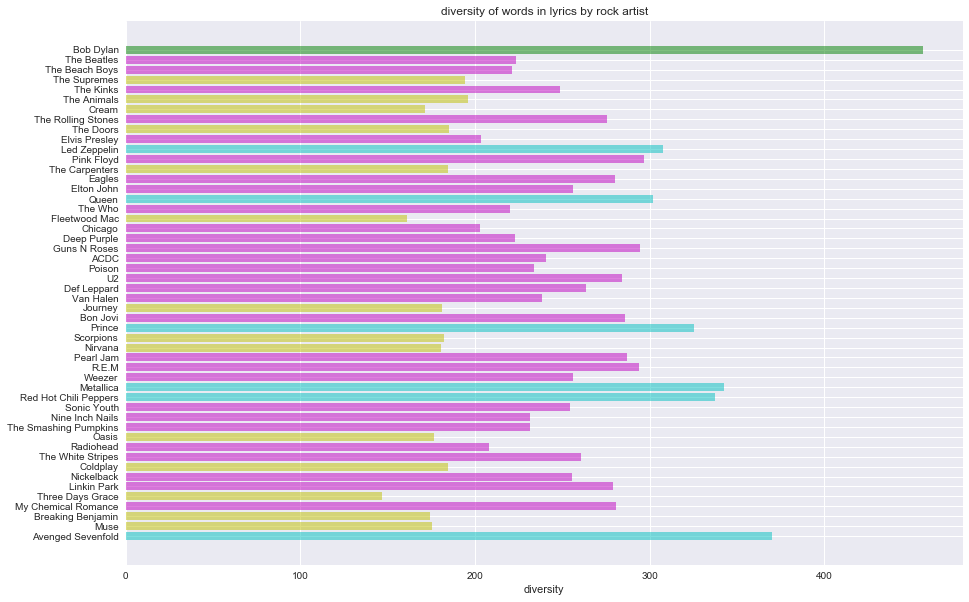

In [41]:
uni_words = uni_words_60 + uni_words_70 + uni_words_80 + uni_words_90+ uni_words_00
colors = []
for uni in uni_words:
    if uni >= 400:
        colors.append('g')
    elif uni >= 300:
        colors.append('c')
    elif uni >= 200:
        colors.append('m')
    else:
        colors.append('y')

plt.figure(figsize=(15,10))    
y_pos = np.arange(50)
plt.barh(y_pos, uni_words[::-1], align='center', alpha=0.5,color=colors[::-1])
plt.yticks(y_pos, artists[::-1], fontsize=10)
plt.xlabel('diversity')
plt.title("diversity of words in lyrics by rock artist")

plt.show()

In [ ]:
uni_words_70 = []
for f in files_70:
    words = f.split()
    uni_words_60.append(len(" ".join(sorted(set(words), key=words.index)))/50)

In [35]:
Bob_Dylan = files_60[0]
words = Bob_Dylan.split()
a = " ".join(sorted(set(words), key=words.index))

In [4]:
words = ['shoot','thunderstruck','balls','jack','rock','voltage','stiff','salute','jailbreak','prowler']

' Back in black I hit the sack I\'ve been too long, I\'m glad to be back Yes, I\'m let loose From the noose That\'s kept me hanging around  I been lookin\' at the sky \'Cause it\'s gettin\' me high Forget the hearse \'cause I\'ll never die I got nine lives Cat\'s eyes Abusin\' every one of them and running wild  \'Cause I\'m back Yes, I\'m back Well, I\'m back Yes, I\'m back Well, I\'m  Back Back Well, I\'m back in black Yes, I\'m back in black, yow  Back in the back of a Cadillac Number one with a bullet I\'m a power pack Yes, I\'m in a band with a gang They\'ve got to catch me if they want me to hang  \'Cause I\'m back on the track And I\'m beatin\' the flack Nobody\'s gonna get me on another rap So look at me now I\'m just makin\' my play Don\'t try to push your luck Just get out of my way  \'Cause I\'m back Yes, I\'m back Well, I\'m back Yes, I\'m back Well I\'m  Back Back Well, I\'m back in black Yes, I\'m back in black  Well, I\'m back Yes, I\'m back Well, I\'m back Yes, I\'m bac